In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import os

In [21]:
current_directory = os.getcwd()
parent_dir = os.path.dirname(current_directory)

In [22]:
def plot_fund_flow_ticks(ticker: str, tick_freq: int):
    fund_flow_df = pd.read_excel(os.path.join(parent_dir, f"flows/{ticker}_fund_flow_data.xlsx"))
    fund_flow_df["asOf"] = pd.to_datetime(fund_flow_df["asOf"])

    dates = fund_flow_df['asOf']
    mask = dates.index % tick_freq == 0  
    selected_dates = dates[mask]

    _, ax = plt.subplots(figsize=(17, 8))

    for _, row in fund_flow_df.iterrows():
        if row["value"] > 0:
            color = "green"
            dx = 0
            dy = row["value"]
            y = 0  
        else:
            color = "red"
            dx = 0
            dy = -row["value"]
            y = row["value"]  

        # Adding an arrow to the plot
        ax.arrow(
            row["asOf"],  
            y,
            dx,
            dy,
            head_width=0.15,  
            head_length=abs(dy) * 0.3,  
            fc=color,  
            ec=color,
        ) 
        
    ax.set_title(f"Daily Fund Inflow and Outflow for {ticker} with Directional Indicators")
    ax.set_xlabel("Date")
    ax.set_ylabel("Fund Movement ($1e6)")

    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
    ax.set_xticks(selected_dates)

    plt.xticks(rotation=45)
    plt.grid(visible=True, linestyle="--", linewidth=0.5)

    ax.axhline(0, color="black", linewidth=0.6)

    plt.tight_layout()

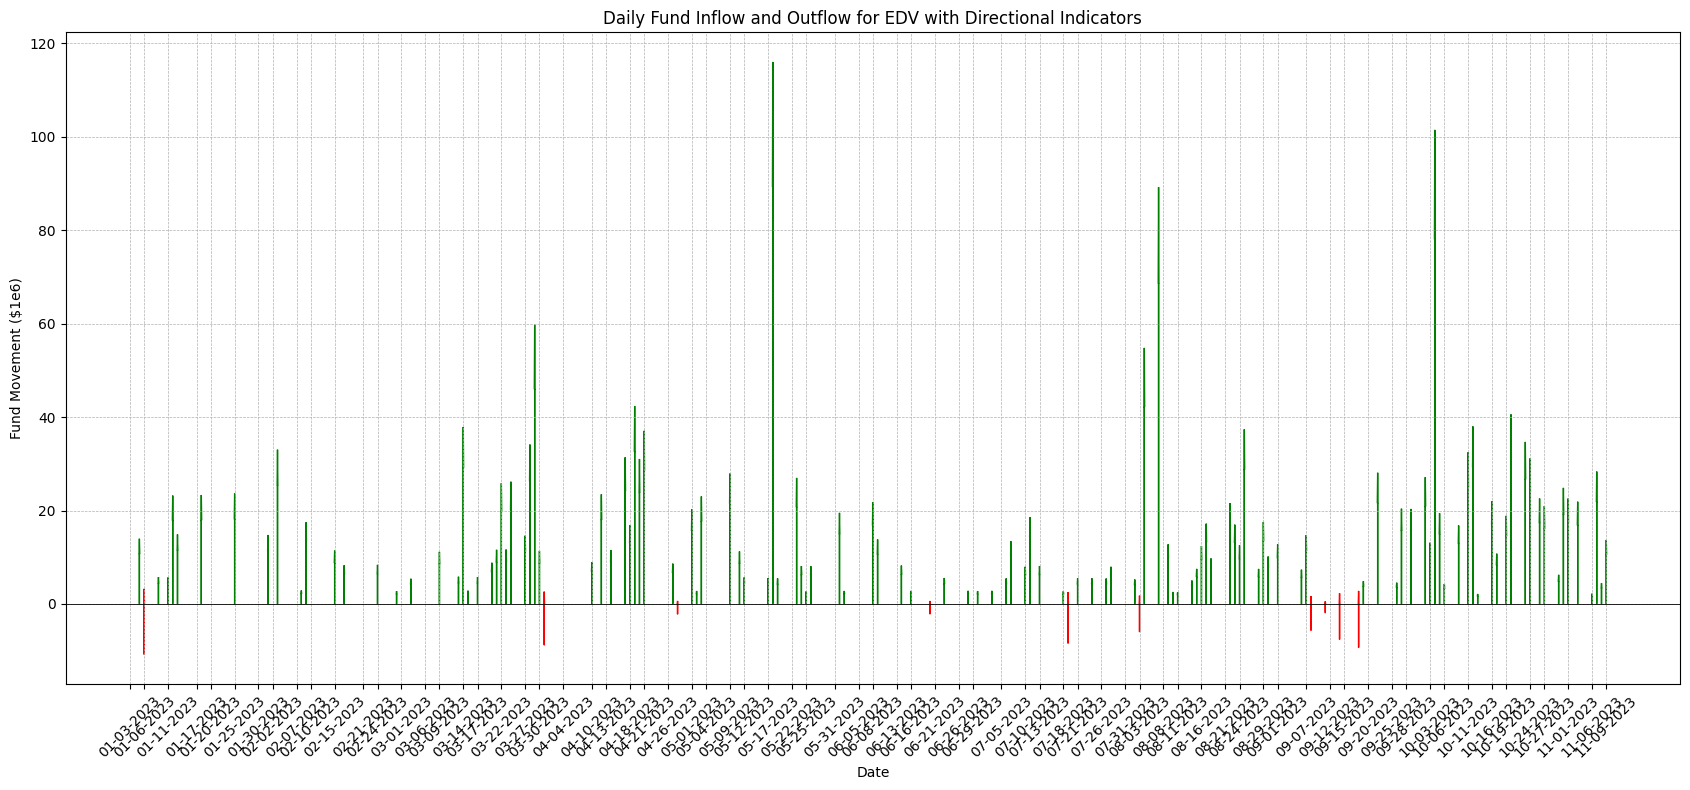

In [19]:
plot_fund_flow_ticks('EDV', 3)

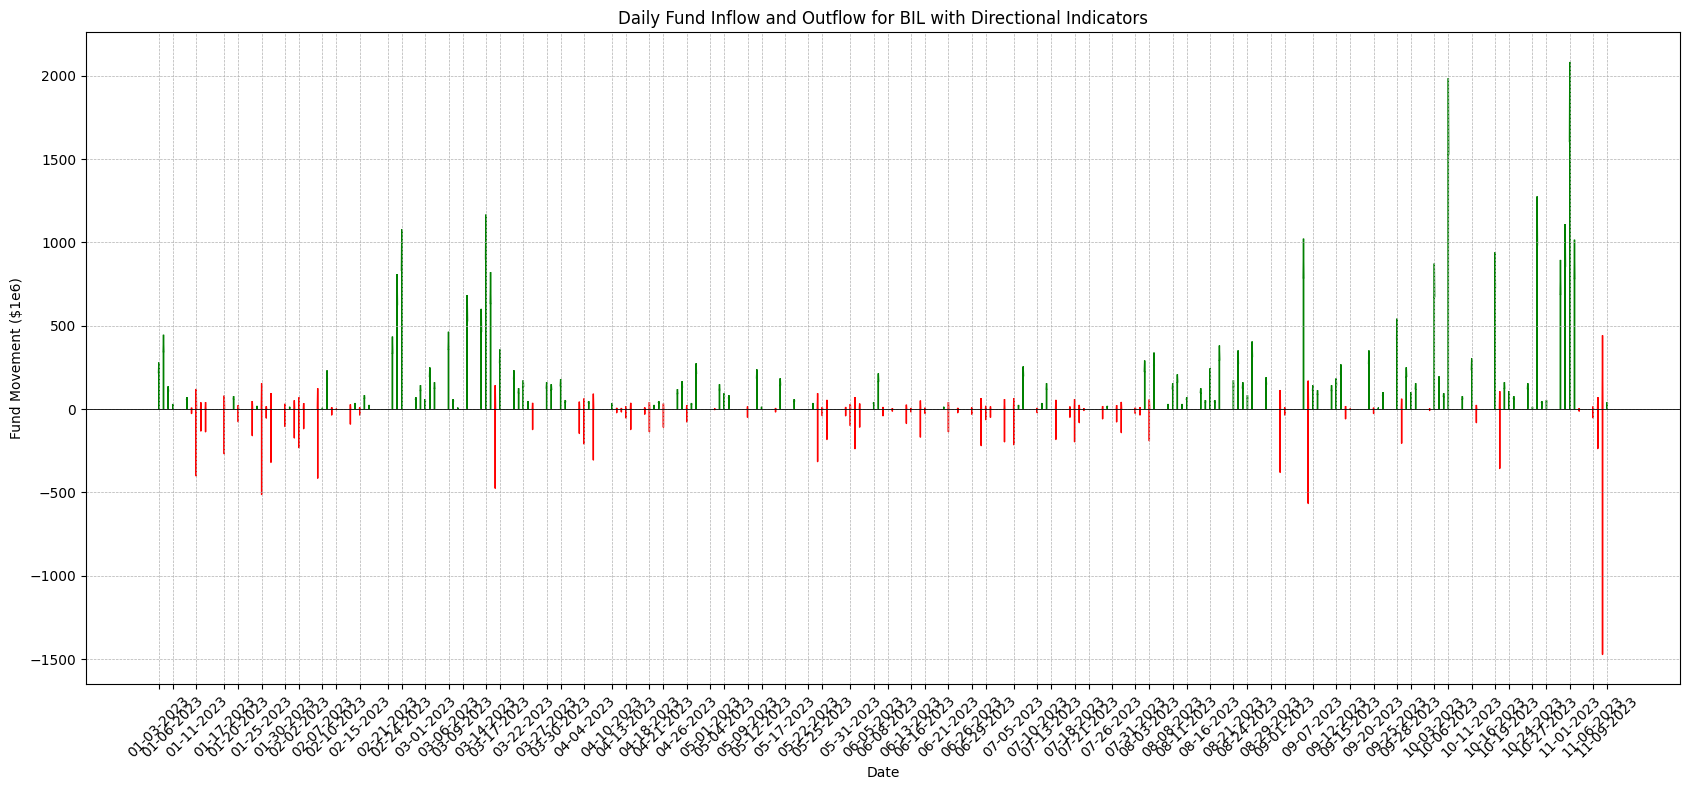

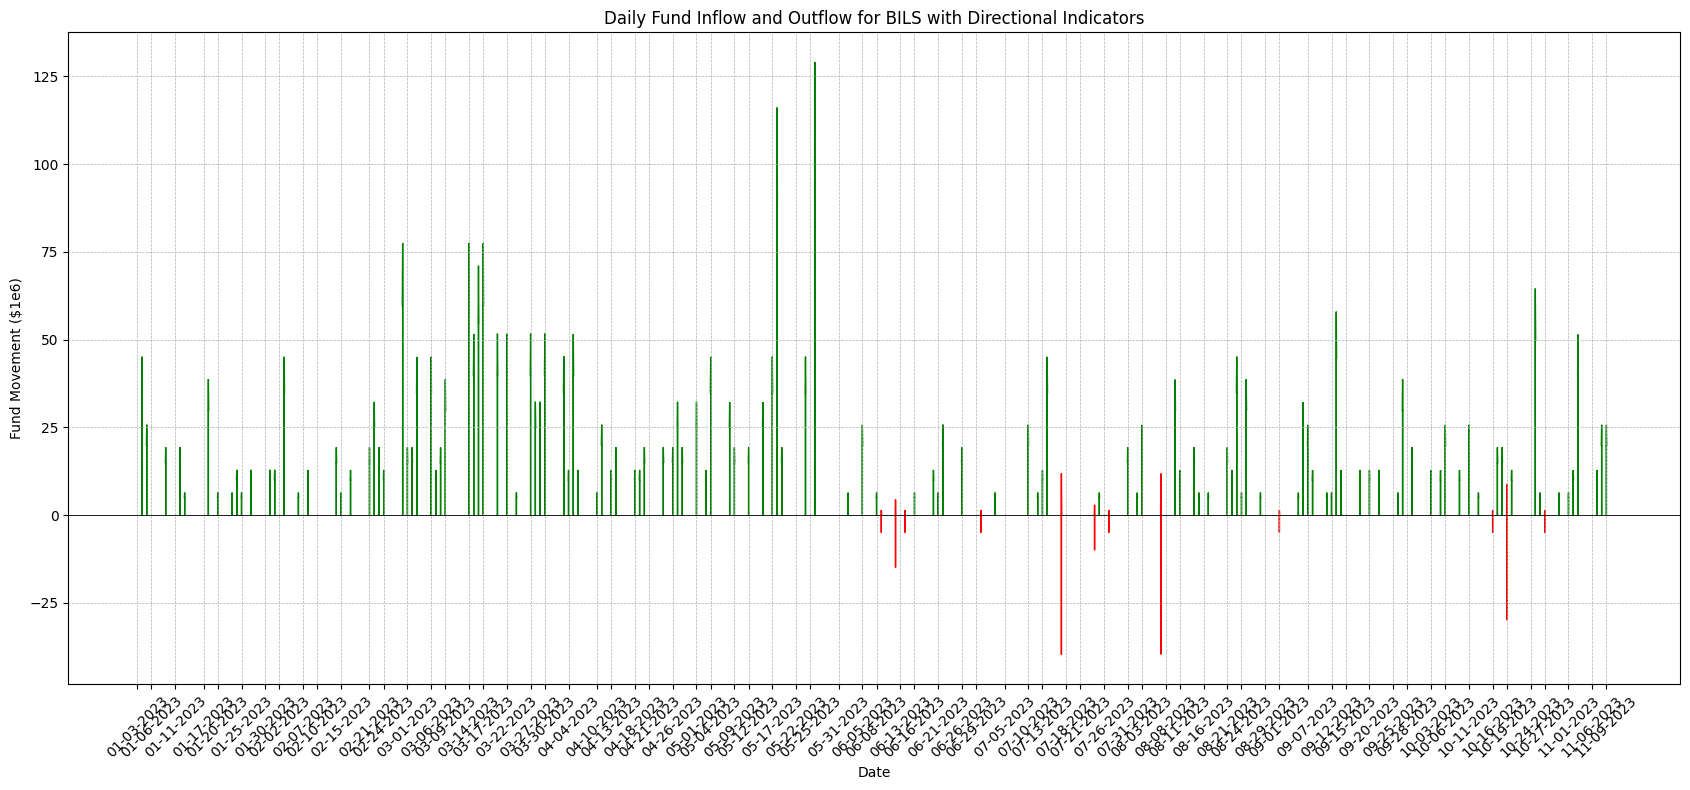

In [24]:
plot_fund_flow_ticks('BIL', 3)
plot_fund_flow_ticks('BILS', 3)